In [1]:
import numpy as np
from io import StringIO

import pylab as pl
from matplotlib import pyplot as plt
import math

In [2]:
data=open("munharmonika.csv", 'r')
plaintext = data.read()
plaintext = plaintext.replace(",", ".")
content = np.genfromtxt(StringIO(plaintext), delimiter=";", dtype=None, skip_header=1000)
sound = (np.array([entry[0] for entry in content]), np.array([entry[1] for entry in content]))

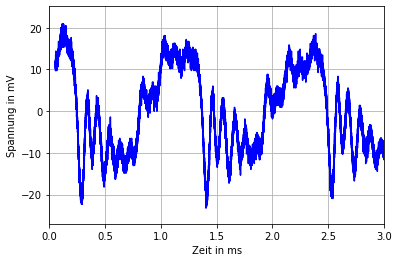

In [3]:
plt.plot(sound[0], sound[1], 'b')
plt.ylabel('Spannung in mV')
plt.xlabel('Zeit in ms')
plt.xlim(0, 3)
plt.grid(True)
plt.show()

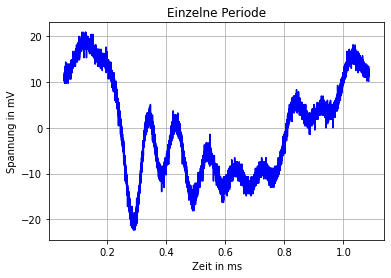

In [4]:
plt.plot(sound[0][:18400], sound[1][:18400], 'b')
plt.title("Einzelne Periode")
plt.ylabel('Spannung in mV')
plt.xlabel('Zeit in ms')
plt.grid(True)
plt.show()

In [5]:
print("Periodendauer: ", sound[0][18400])
periodendauer = sound[0][18400]
frequenz = 1000/periodendauer
print(frequenz, " Hz")

Periodendauer:  1.08623195
920.6136866071745  Hz


In [6]:
funcAmplitude = np.vectorize(lambda x : np.abs(x))
funcVerschiebung = np.vectorize(lambda x: np.arctan(x.imag/x.real))
frequenzcalc = np.vectorize(lambda x: round(x / (sound[0][-1] / ((len(sound)) * 1000) * len(sound))))

Grundfrequenz:  920 Hz
Stärkste Frequenz:  920 Hz


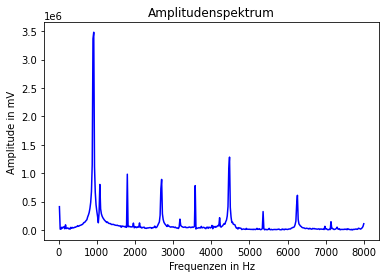

In [7]:
fourier = np.fft.fft(sound[1])
frequenzspektrum = np.array(funcAmplitude(fourier),dtype=int)
frequenzen = np.array(range(1,len(fourier)+1),dtype=int)
frequenzen = frequenzcalc(frequenzen)
plt.plot(frequenzen[:400], frequenzspektrum[:400], 'b')
plt.title("Amplitudenspektrum")
plt.ylabel('Amplitude in mV')
plt.xlabel('Frequenzen in Hz')
print("Grundfrequenz: ",frequenzen[np.argmax(frequenzspektrum)],"Hz")
print("Stärkste Frequenz: ", frequenzen[np.argmax(frequenzspektrum)],"Hz")

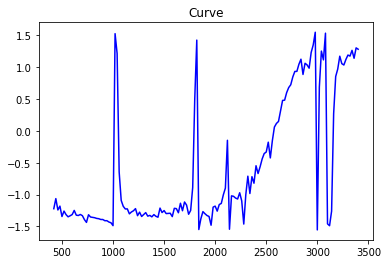

In [8]:
phasenspektrum = funcVerschiebung(fourier)
plt.title("Curve")
plt.plot(frequenzen[20:170], phasenspektrum[20:170], 'b')

In [9]:
frequencys = [100, 200, 300, 400, 500, 700, 850, 1000, 1200, 1500, 1700, 2000, 3000, 4000, 5000, 6000, 10000]
amplitudeInputSmall = [14.41, 22.27, 31.01, 54.6, 116, 54.07, 47.96, 45.35,  33.14, 34.88, 31.39, 35.82, 40.99, 30.52, 34.01, 13.95, 20.93]
amplitudeOutputSmall = [1559, 1490, 1507, 1490, 1490, 1507, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1519, 1519]
phasengangSmall = [3.701, 2.884, 2.204, 1.85, 1.769, 1.605, 1.306, 1.197, 1.034, 1.524, 1.306, 1.17, 1.143, 1.129, 1.163, 1.115, 1.053]
amplitudeInputLarge = [71.52, 174.3, 130.7, 99.33, 81.9, 64.47, 64.47, 73.19, 64.47, 67.96, 64.47, 67.96, 74.93, 50.54, 38.33, 33.1, 36.59]
amplitudeOutputLarge = [1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1477]
phasengangLarge = [4.917, 4.4, 3.366, 2.713, 2.251, 1.679, 1.326, 1.175, 1.01, 0.8314, 0.7285, 0.6461, 0.4952, 0.3991, 0.3579, 0.3030, 0.2378]

In [10]:
def toPhasenwinkel(phasenwinkel):
    results = []
    for i in range(len(phasenwinkel)):
        results.append((phasenwinkel[i]/1000 * -1) * frequencys[i] * 360)
    return results

def calcDecibels(voltages, voltages_ref):
    #power_db = 20 * log10(amp / amp_ref);
    db = []
    for i in range(len(voltages)):
        db.append(20*np.log10(voltages[i]/voltages_ref[i]))
    return db

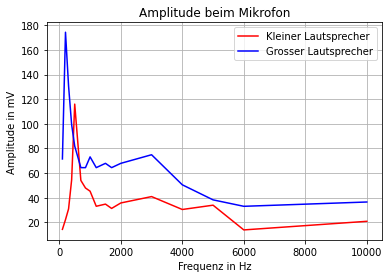

In [11]:
#amplituden
plt.plot(frequencys, amplitudeInputSmall, "r", label = "Kleiner Lautsprecher")
plt.plot(frequencys, amplitudeInputLarge, "b", label = "Grosser Lautsprecher")
plt.title("Amplitude beim Mikrofon")
plt.ylabel("Amplitude in mV")
plt.xlabel("Frequenz in Hz")
plt.grid(True)
plt.legend()

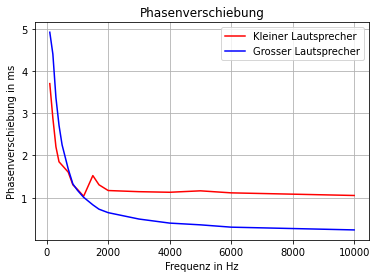

In [12]:
#phasengang
plt.plot(frequencys, phasengangSmall, "r", label = "Kleiner Lautsprecher")
plt.plot(frequencys, phasengangLarge, "b", label = "Grosser Lautsprecher")
plt.title("Phasenverschiebung")
plt.ylabel("Phasenverschiebung in ms")
plt.xlabel("Frequenz in Hz")
plt.grid(True)
plt.legend()

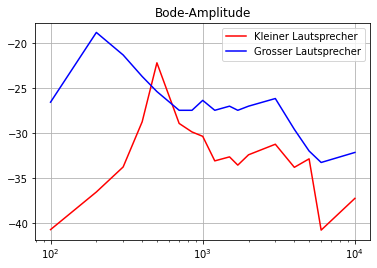

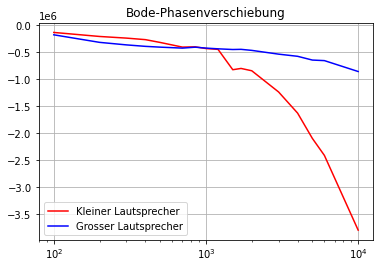

In [13]:
plt.plot(frequencys, calcDecibels(amplitudeInputSmall, amplitudeOutputSmall), "r", label = "Kleiner Lautsprecher")
plt.plot(frequencys, calcDecibels(amplitudeInputLarge, amplitudeOutputLarge), "b", label = "Grosser Lautsprecher")
plt.title("Bode-Amplitude")
plt.grid(True)
plt.semilogx()
plt.legend()
plt.show()

#phasengang
plt.plot(frequencys, toPhasenwinkel(phasengangSmall), "r", label = "Kleiner Lautsprecher")
plt.plot(frequencys, toPhasenwinkel(phasengangLarge), "b", label = "Grosser Lautsprecher")
plt.title("Bode-Phasenverschiebung")
plt.grid(True)
plt.semilogx()
plt.legend()
plt.show()